<a href="https://colab.research.google.com/github/PatrickRuan/DL-CVMarathon/blob/master/homework/Day41_train_yolov3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業

1. 如何使用已經訓練好的模型？
2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？





In [ ]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


In [ ]:
pip install keras==2.2.4 # 需要安裝 keras 2.2.4 的版本

     |████████████████████████████████| 317kB 8.9MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
%cd 'gdrive/My Drive'
# !git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
%cd keras-yolo3

Mounted at /content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/keras-yolo3


In [ ]:
from PIL import Image
image = Image.open('dog.jpg') 

1.如何使用已經訓練好的模型？

如果你理解了這包程式碼，其實就會知道可以直接從 yolo.py 從 include create YOLO 的 class，然後提供我們訓練好的模型檔案以及描述類別的文件就可以啦

In [ ]:
!ls model_data

coco_classes.txt       voc_classes.txt	 yolo.h5
tiny_yolo_anchors.txt  yolo_anchors.txt  yolov3-tiny.h5


In [ ]:
from yolo import YOLO
#yolo_model = YOLO(model_path='logs/000/trained_weights_final.h5', classes_path="model_data/voc_classes.txt")
#yolo_model = YOLO(model_path='model_data/yolo.h5', classes_path="model_data/voc_classes.txt")
yolo_model = YOLO(model_path = 'model_data/yolov3-tiny.h5', anchors_path = 'model_data/tiny_yolo_anchors.txt') # 提供 tiny-yolov3 的模型以及 anchor 檔案來初始化 YOLO

r_image = yolo_model.detect_image(image)

model_data/yolov3-tiny.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 4 boxes for img
dog 0.59 (132, 189) (369, 514)
truck 0.41 (482, 83) (673, 170)
car 0.72 (467, 70) (677, 170)
bicycle 0.50 (204, 152) (577, 449)
11.204624024999703


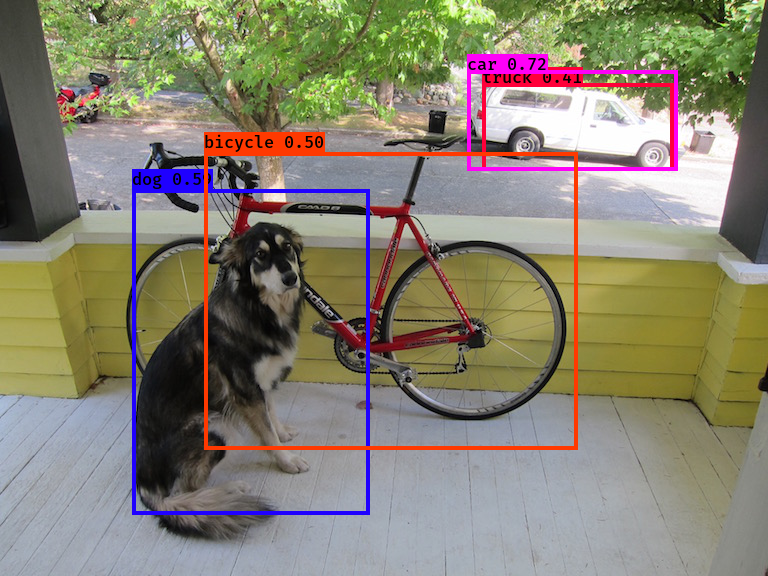

In [ ]:
r_image

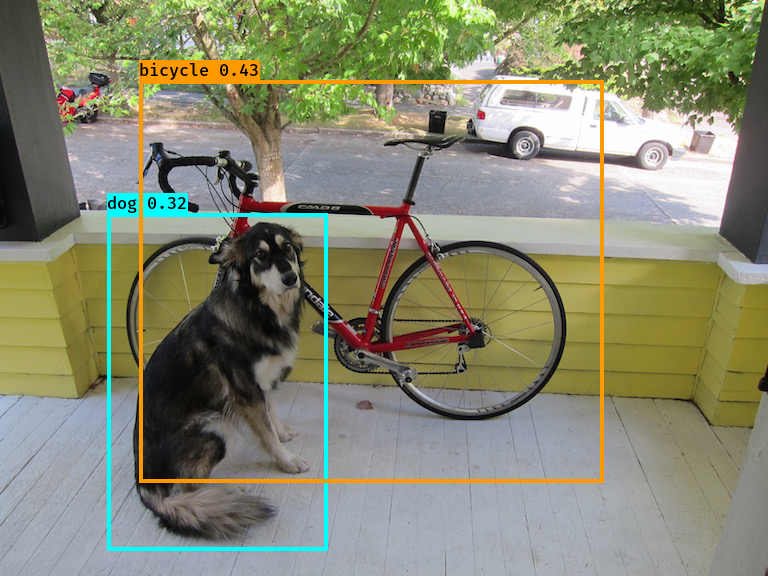

In [ ]:
r_image

這個模型用了 pretrained 的權重以及 100 張圖片來 finetune，所以結果沒有很好，在這裡只是示範怎麼使用哦

2.請敘述，訓練模型時，資料集的格式是什麼？

這個問題背後的動機是希望確保你理解在訓練模型的時候我們需要把資料轉換成這份 YOLO 訓練程式碼“讀得懂”的格式。其實很簡單，只要把範例中 `convert_annotation` 這個函數給看懂就可以了

In [ ]:
with open("VOCdevkit/2007_train.txt", "r") as f:
  d = f.readlines()
print(d[:10])

['VOC2007/JPEGImages/024.jpg 543,95,586,135,1 458,306,501,360,1 209,290,255,337,1 360,345,414,400,1 307,357,364,395,1 309,479,376,538,1 407,477,439,543,1 305,430,353,487,1 320,309,386,332,1 435,238,455,267,1 342,204,377,249,1 319,111,357,177,1 313,18,356,57,1 374,27,419,75,1 425,90,451,150,1 469,120,512,160,1 365,151,433,180,1 412,547,472,589,1 480,445,542,482,1 347,402,401,434,1 510,328,577,365,1 172,318,202,347,1 280,418,316,459,1 274,342,299,387,1 248,352,290,392,1 480,503,514,538,1 352,558,397,590,1 304,528,342,568,1 560,63,597,108,1 422,318,450,375,1 526,213,560,272,1\n', 'VOC2007/JPEGImages/037.jpg 353,2,384,35,1 442,1,468,38,1 145,144,192,188,1 117,146,144,198,1 102,210,134,251,1 159,1,186,47,1 167,18,201,86,1 372,51,400,101,1 407,34,467,75,1 370,1,422,31,1 546,3,570,49,1 385,436,427,471,1 283,497,326,522,1 249,384,284,434,1 269,340,308,372,1 260,265,294,307,1 317,425,352,480,1 299,438,344,466,1 297,532,329,567,1 320,507,349,539,1 341,525,367,563,1 256,588,304,607,1 302,582,349,

這是檔案的每一行對應的是一張圖片的路徑以及該圖片中物件的坐標及類別信息。首先是圖片路徑，然後以空白鍵區隔每個物件的信息，物件訊息的順序是包圍框的左上角 x,y，右下角 x, y 以及類別 index。